## Vector Error Correction Model ( 벡터오차수정모형)

   - 단위근 검정
   - 차수 설정
   - 공적분 검정 
   - 장기모형 설정
   - VECM 모형 설정 
   - 인과관계 검정 
   - 충격반응분석
   - 예측

In [1]:
#pip install numpy==1.19.5

In [2]:
import warnings 
warnings.filterwarnings(action='ignore')

In [3]:
import os

import pandas as pd
import numpy as np
import pandas_datareader.data as pdr 

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')


import seaborn as sns
plt.style.use('seaborn-whitegrid')
from pylab import rcParams
%matplotlib inline
import itertools


import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [4]:
#한글폰트 적용
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [5]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.api import VAR,VECM
from statsmodels.tsa.vector_ar import vecm
from statsmodels.tsa.vector_ar.vecm import *
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('수출금액_최종.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
print(data.shape)
#data.dtypes

#data.dtypes --> float type 확인
data['한국수출금액_USD'] = (data['한국수출금액_USD'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
data['화물수송총괄'] = (data['화물수송총괄'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
data['코스피지수'] = (data['코스피지수'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
data['코스닥지수'] = (data['코스닥지수'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
data['환율'] = (data['환율'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
data['부산항수출금액_1000달러'] = (data['부산항수출금액_1000달러'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
data['부산항수입금액_1000달러'] = (data['부산항수입금액_1000달러'].str.split()).apply(lambda x: float(x[0].replace(',', '')))

(264, 21)


In [7]:
data.describe()

한국수출금액_USD    한국수입금액_USD      경기종합지수      수출물가지수      수입물가지수  \
count  2.640000e+02  2.640000e+02  264.000000  264.000000  264.000000   
mean   3.523252e+10  3.218020e+10   87.310606  111.821591  104.155303   
std    1.337332e+10  1.209851e+10   20.017094   11.318810   22.067721   
min    1.102304e+10  1.047116e+10   56.200000   86.800000   62.800000   
25%    2.325228e+10  2.187783e+10   69.525000  103.675000   91.200000   
50%    3.939702e+10  3.534834e+10   85.600000  113.650000  104.000000   
75%    4.631255e+10  4.249717e+10  103.300000  120.400000  119.825000   
max    6.073412e+10  6.115967e+10  127.700000  139.800000  149.100000   

             화물수송총괄        코스피지수        코스닥지수           환율       Dubai  \
count  2.640000e+02   264.000000   264.000000   264.000000  264.000000   
mean   1.011157e+08  1655.504886   648.243030  1129.493409   61.492083   
std    3.073934e+07   659.229137   255.400619    98.938941   28.592609   
min    1.669310e+05   479.680000   307.480000   915.860000   17.690000   
25%    8.429226e+07  1050.112500   503.587500  1078.927500   37.985000   
50%    1.034534e+08  1881.050000   607.325000  1130.800000   58.790000   
75%    1.229345e+08  2042.212500   707.527500  1182.415000   77.257500   
max    1.497036e+08  3296.680000  2663.700000  1461.980000  131.310000   

             다우존스지수         나스닥지수   한국소비자물가지수   미국생산자물가지수     전산업생산지수  \
count    264.000000    264.000000  264.000000  264.000000  264.000000   
mean   15544.495000   4282.620076   85.335367   98.961477   88.572727   
std     6967.068724   3223.902119   12.327556   15.299625   16.987406   
min     7062.930000   1172.060000   62.393000   70.940000   51.900000   
25%    10467.095000   2119.285000   74.413000   86.380000   73.500000   
50%    12627.300000   2820.590000   87.812500  104.180000   91.400000   
75%    18135.130000   5136.742500   95.632500  109.290000  102.325000   
max    36338.300000  15644.970000  104.040000  128.740000  129.300000   

              실업률  부산항수출금액_1000달러  부산항수입금액_1000달러     반도체수출금액현황      수출단가지수  \
count  264.000000    2.640000e+02    2.640000e+02  2.640000e+02  264.000000   
mean     3.604545    1.053770e+07    7.937359e+06  4.610362e+09  107.604167   
std      0.559857    3.431099e+06    2.535356e+06  2.884922e+09   11.846879   
min      2.600000    4.212740e+06    3.209252e+06  8.673130e+08   77.200000   
25%      3.200000    7.254241e+06    5.783653e+06  2.399574e+09   98.375000   
50%      3.500000    1.143047e+07    8.881660e+06  4.085099e+09  110.600000   
75%      3.900000    1.341750e+07    9.967100e+06  5.771186e+09  117.300000   
max      5.700000    1.650429e+07    1.212610e+07  1.284298e+10  137.100000   

         무역경기확산지수  
count  264.000000  
mean    53.186364  
std     13.234741  
min     11.900000  
25%     44.400000  
50%     53.000000  
75%     61.500000  
max     86.700000

<AxesSubplot:>

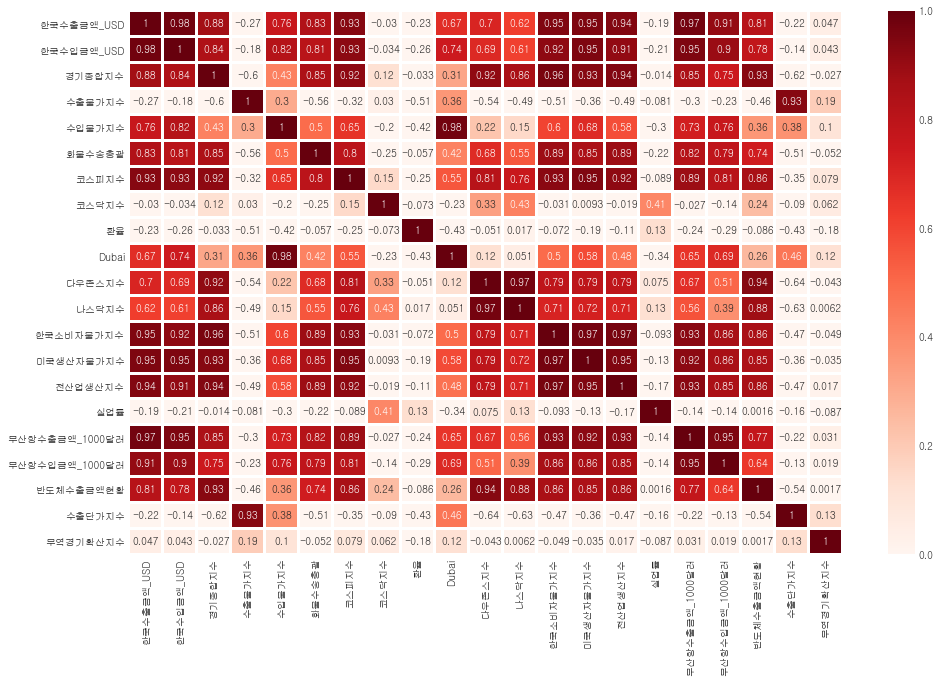

In [8]:
# 상관계수 확인 
plt.rcParams["figure.figsize"] = (16,10)
sns.heatmap(data.corr(), annot=True, cmap='Reds', linewidths=2, vmin=0)

### 단위근 검정
 - H0 : 비정상 시계열 
 - H1 : 정상 시계열

In [9]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'   ADF 검정 : "{name}"', "\n   ", '-'*47)
    print(f' H0 : 단위근 존재 --> 비정상 시계열.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. H0 기각")
        print(f" => 정상 시계열 .")
    else:
        print(f" => P-Value = {p_value}. H0 채택")
        print(f" => 비정상 시계열")
        
for name, column in data.iteritems():
    adfuller_test(column, name=column.name)
    print()

   ADF 검정 : "한국수출금액_USD" 
    -----------------------------------------------
 H0 : 단위근 존재 --> 비정상 시계열.
 Significance Level    = 0.05
 Test Statistic        = -0.9662
 => P-Value = 0.7654. H0 채택
 => 비정상 시계열

   ADF 검정 : "한국수입금액_USD" 
    -----------------------------------------------
 H0 : 단위근 존재 --> 비정상 시계열.
 Significance Level    = 0.05
 Test Statistic        = -0.7802
 => P-Value = 0.8249. H0 채택
 => 비정상 시계열

   ADF 검정 : "경기종합지수" 
    -----------------------------------------------
 H0 : 단위근 존재 --> 비정상 시계열.
 Significance Level    = 0.05
 Test Statistic        = 2.7759
 => P-Value = 1.0. H0 채택
 => 비정상 시계열

   ADF 검정 : "수출물가지수" 
    -----------------------------------------------
 H0 : 단위근 존재 --> 비정상 시계열.
 Significance Level    = 0.05
 Test Statistic        = -2.8106
 => P-Value = 0.0568. H0 채택
 => 비정상 시계열

   ADF 검정 : "수입물가지수" 
    -----------------------------------------------
 H0 : 단위근 존재 --> 비정상 시계열.
 Significance Level    = 0.05
 Test Statistic        = -2.0314
 => P-Value = 0.2

In [10]:
# 유의수준 10%기준까지 확장하여 정상시계열 변수 제거 
data = data.drop(['수출물가지수','환율','실업률','무역경기확산지수'],axis=1) 

In [11]:
data.shape

(264, 17)

### VECM 차수 설정

In [12]:
df = data

In [13]:
import warnings 
warnings.filterwarnings(action='ignore')

In [14]:
model = vecm.select_order(df, maxlags=3)
model.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### 공적분 검정 ( Johansen Cointegration Test)
   - H0 : 공적분 존재 X --> VAR
   - H1 : 공적분 존재 O --> VECM(장기적 균형관계 성립) [ Trace, Eigen]

In [15]:
rank_test = select_coint_rank(df, 1, 1, method="trace",signif=0.05)
rank_test.rank # Trace 

7

In [16]:
rank_test.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [17]:
rank_test = select_coint_rank(df, 1, 1, method="maxeig",signif=0.05)
rank_test.rank # Eigen

5

In [18]:
rank_test.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### VECM 모형 설정

In [19]:
# add seasonality and the deterministic trend which is 

#    "nc" - no deterministic terms
#    "co" - constant outside the cointegration relation
#    "ci" - constant within the cointegration relation
#    "lo" - linear trend outside the cointegration relation
#    "li" - linear trend within the cointegration relation

In [20]:
model = VECM(df,deterministic='ci', k_ar_diff= 3, coint_rank=6,seasons=4) 
vecm_res = model.fit()
vecm_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
Det. terms outside the coint. relation & lagged endog. parameters for equation 한국수출금액_USD
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
season1            2.117e+08   4.46e+08      0.475      0.635   -6.62e+08    1.09e+09
season2             7.21e+08   4.44e+08      1.625      0.104   -1.49e+08    1.59e+09
season3            1.409e+09   4.07e+08      3.462      0.001    6.11e+08    2.21e+09
L1.한국수출금액_USD        -0.6265      0.116     -5.399      0.000      -0.854      -0.399
L1.한국수입금액_USD        -0.3271      0.165     -1.977      0.048      -0.651      -0.003
L1.경기종합지수          1.279e+08   5.98e+08      0.214      0.831   -1.05e+09     1.3e+09
L1.수입물가지수          1.895e+08   1.66e+08      1.141      0.254   -1.36e+08    5.15e+08
L1.화물수송총괄            22.2833     20.567      1.083      0.279     -18.028      62.595
L1.코스피지수           4.619e+06   1.96e+06      2.351      0.019    7.69e+05    8.47e+06
L1.코스닥지수          -8.623e+06   2.82e+06     -3.053      0.002   -1.42e+07   -3.09e+06
L1.Dubai           6.245e+06   6.85e+07      0.091      0.927   -1.28e+08    1.41e+08
L1.다우존스지수          6.271e+04   2.93e+05      0.214      0.831   -5.12e+05    6.37e+05
L1.나스닥지수           7.451e+05   8.47e+05      0.880      0.379   -9.15e+05    2.41e+06
L1.한국소비자물가지수       4.689e+08   4.91e+08      0.954      0.340   -4.94e+08    1.43e+09
L1.미국생산자물가지수      -1.354e+07   1.84e+08     -0.074      0.941   -3.74e+08    3.47e+08
L1.전산업생산지수         2.211e+08   8.25e+07      2.682      0.007    5.95e+07    3.83e+08
L1.부산항수출금액_1000달러   615.8288    402.833      1.529      0.126    -173.710    1405.368
L1.부산항수입금액_1000달러  -272.5751    423.029     -0.644      0.519   -1101.697     556.547
L1.반도체수출금액현황          0.9269      0.342      2.711      0.007       0.257       1.597
L1.수출단가지수          1.948e+08   1.02e+08      1.908      0.056   -5.27e+06    3.95e+08
L2.한국수출금액_USD        -0.1786      0.120     -1.490      0.136      -0.413       0.056
L2.한국수입금액_USD        -0.1108      0.151     -0.733      0.464      -0.407       0.186
L2.경기종합지수          3.603e+08   6.26e+08      0.575      0.565   -8.67e+08    1.59e+09
L2.수입물가지수          2.792e+08   1.71e+08      1.636      0.102   -5.53e+07    6.14e+08
L2.화물수송총괄            49.4279     21.309      2.320      0.020       7.663      91.192
L2.코스피지수           2.355e+05   2.01e+06      0.117      0.907   -3.71e+06    4.18e+06
L2.코스닥지수          -6.013e+06    2.5e+06     -2.408      0.016   -1.09e+07   -1.12e+06
L2.Dubai          -5.717e+07   7.11e+07     -0.804      0.421   -1.97e+08    8.22e+07
L2.다우존스지수          3.267e+05   3.01e+05      1.085      0.278   -2.63e+05    9.17e+05
L2.나스닥지수           9.984e+05   8.58e+05      1.164      0.245   -6.83e+05    2.68e+06
L2.한국소비자물가지수      -5.335e+08   4.91e+08     -1.087      0.277    -1.5e+09    4.29e+08
L2.미국생산자물가지수       1.771e+08   1.87e+08      0.949      0.342   -1.89e+08    5.43e+08
L2.전산업생산지수        -1.141e+08   7.13e+07     -1.601      0.109   -2.54e+08    2.56e+07
L2.부산항수출금액_1000달러   435.3036    374.664      1.162      0.245    -299.025    1169.632
L2.부산항수입금액_1000달러  -549.6664    389.770     -1.410      0.158   -1313.601     214.268
L2.반도체수출금액현황          0.2079      0.344      0.605      0.545      -0.465       0.881
L2.수출단가지수         -1.601e+08   9.74e+07     -1.644      0.100   -3.51e+08    3.07e+07
L3.한국수출금액_USD        -0.1813      0.101     -1.795      0.073      -0.379       0.017
L3.한국수입금액_USD        -0.0836      0.127     -0.657      0.511      -0.333       0.166
L3.경기종합지수         -6.669e+08   5.45e+08     -1.223      0.221   -1.74e+09    4.02e+08
L3.수입물가지수         -7.782e+07   1.69e+08     -0.460      0.646    -4.1e+08    2.54e+08
L3.화물수송총괄           -25.2988     20.296     -1.247      0.213     -65.077     

#### 오차의 자기상관 확인 --> DW검정

In [21]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(vecm_res.resid)
for col, val in zip(data.columns, out):
    print((col), ':', round(val, 2))

한국수출금액_USD : 2.03
한국수입금액_USD : 2.04
경기종합지수 : 1.88
수입물가지수 : 2.04
화물수송총괄 : 2.11
코스피지수 : 2.07
코스닥지수 : 2.07
Dubai : 2.06
다우존스지수 : 2.0
나스닥지수 : 2.06
한국소비자물가지수 : 2.04
미국생산자물가지수 : 2.06
전산업생산지수 : 2.07
부산항수출금액_1000달러 : 1.97
부산항수입금액_1000달러 : 2.05
반도체수출금액현황 : 1.85
수출단가지수 : 2.0


### VECM 그레인저 인과관계

In [22]:
granger_results = vecm_res.test_granger_causality(causing='한국수입금액_USD',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [23]:
granger_results = vecm_res.test_granger_causality(causing='경기종합지수',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [24]:
granger_results = vecm_res.test_granger_causality(causing='수입물가지수',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [25]:
granger_results = vecm_res.test_granger_causality(causing='화물수송총괄',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [26]:
granger_results = vecm_res.test_granger_causality(causing='코스피지수',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [27]:
granger_results = vecm_res.test_granger_causality(causing='코스닥지수',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [28]:
granger_results = vecm_res.test_granger_causality(causing='Dubai',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [29]:
granger_results = vecm_res.test_granger_causality(causing='다우존스지수',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [30]:
granger_results = vecm_res.test_granger_causality(causing='나스닥지수',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [31]:
granger_results = vecm_res.test_granger_causality(causing='한국소비자물가지수',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [32]:
granger_results = vecm_res.test_granger_causality(causing='미국생산자물가지수',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [33]:
granger_results = vecm_res.test_granger_causality(causing='전산업생산지수',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [34]:
granger_results = vecm_res.test_granger_causality(causing='부산항수출금액_1000달러',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [35]:
granger_results = vecm_res.test_granger_causality(causing='부산항수입금액_1000달러',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [36]:
granger_results = vecm_res.test_granger_causality(causing='반도체수출금액현황',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [37]:
granger_results = vecm_res.test_granger_causality(causing='수출단가지수',caused="한국수출금액_USD", signif=0.05)
granger_results.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

### VECM 충격반응분석

In [38]:
#한글폰트 적용
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

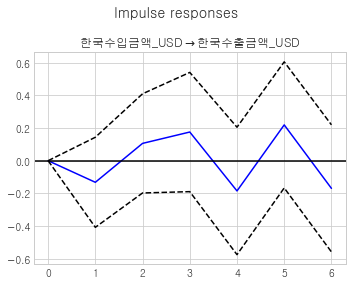

In [39]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='한국수입금액_USD',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

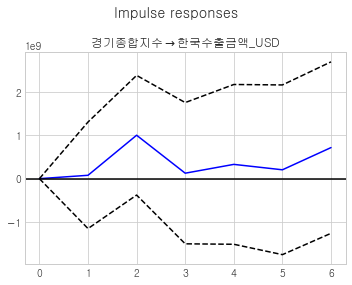

In [40]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='경기종합지수',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

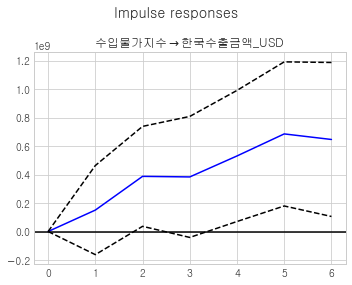

In [41]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='수입물가지수',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

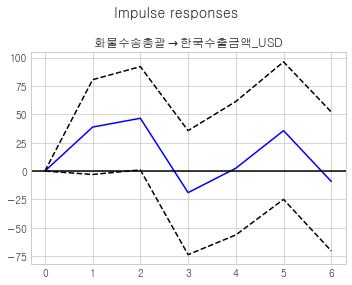

In [42]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='화물수송총괄',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

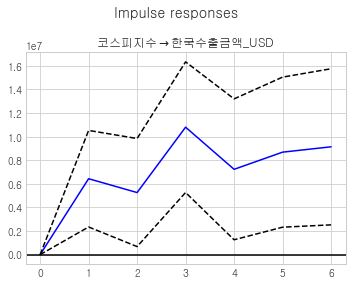

In [43]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='코스피지수',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

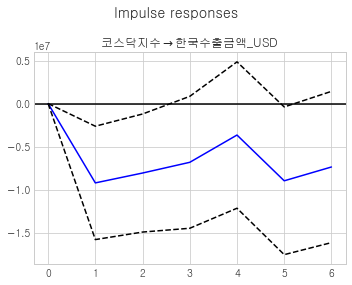

In [44]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='코스닥지수',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

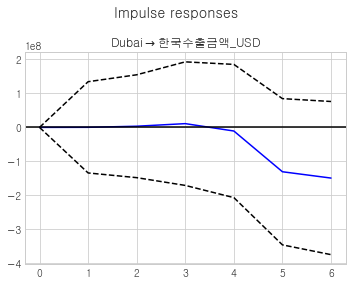

In [45]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='Dubai',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

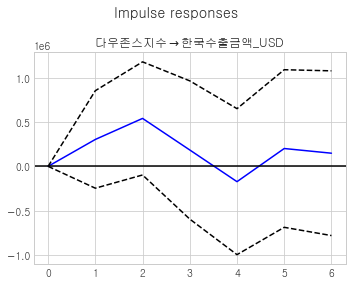

In [46]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='다우존스지수',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

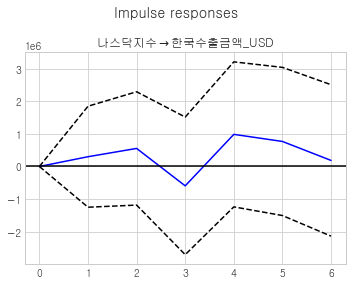

In [47]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='나스닥지수',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

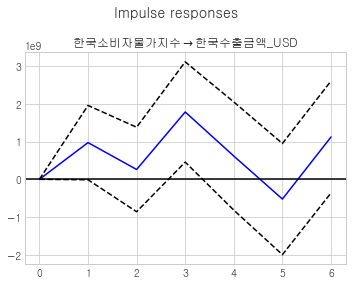

In [48]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='한국소비자물가지수',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

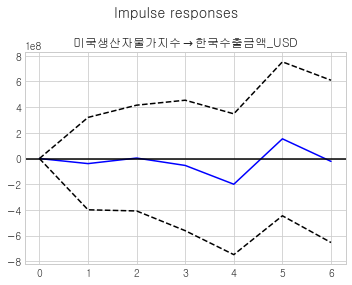

In [49]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='미국생산자물가지수',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

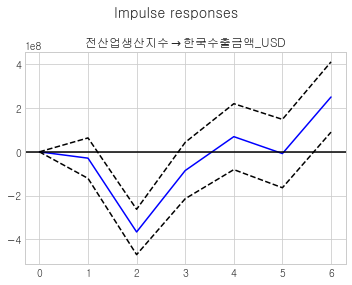

In [50]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='전산업생산지수',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

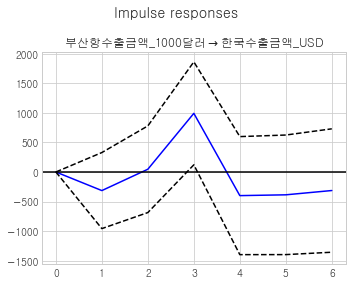

In [51]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='부산항수출금액_1000달러',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

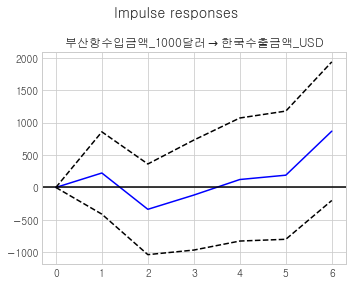

In [52]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='부산항수입금액_1000달러',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

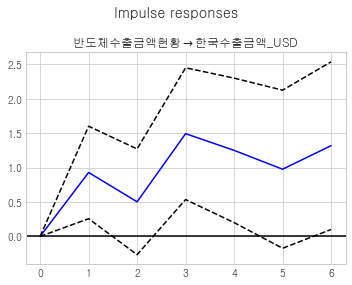

In [53]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='반도체수출금액현황',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

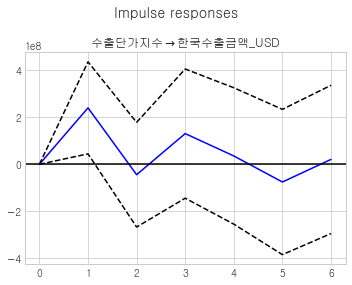

In [54]:
forecast_num = 6
vecm_res.irf(forecast_num).plot(impulse='수출단가지수',response='한국수출금액_USD',figsize=(5,4))
plt.tight_layout() 
plt.show()

###  예측값

In [55]:
pd.options.display.float_format = "{:.0f}".format
forecast, lower, upper = vecm_res.predict(6, 0.05)
print("\npoint forecasts:")
print(pd.DataFrame(forecast.round(2)))


point forecasts:
           0           1   2   3         4    5    6   7     8     9   10  11  \
0 55216358824 57642299047 129 120 136418737 2829 1088  70 35779 15689 104 130   
1 54588287638 56007513803 130 119 128260273 2872 1133  69 36446 15938 105 130   
2 60794817355 58956448952 132 118 141355620 3038 1264  66 37360 16435 106 130   
3 57719932325 56667122829 133 120 131315833 3144 1307  69 38022 16740 106 131   
4 60988812437 57418396257 134 121 135096926 3168 1334  72 37990 16857 107 132   
5 63624751402 57910655983 135 122 130540554 3246 1348  74 38441 17129 107 132   

   12       13      14          15  16  
0 111 10790584 6323968 11518625231  96  
1 112 11882151 5623377 11449467305  95  
2 118 13263873 6997745 12266204279  95  
3 111 12463716 6233523 11705132495  95  
4 118 13262014 6555814 12712975652  96  
5 122 13563164 6527394 12982468051  96  


In [56]:
print("lower 95% interval forecasts:")
print(pd.DataFrame(lower.round(2)))

lower 95% interval forecasts:
           0           1   2   3         4    5    6   7     8     9   10  11  \
0 52133131125 55595837253 128 116 126013663 2684 1000  62 34594 15287 104 128   
1 50956586690 53385382813 129 112 115067411 2659 1019  54 34803 15395 104 127   
2 56230824209 55313689256 131 108 125702090 2771 1127  45 35371 15761 105 127   
3 52196966472 51933430619 132 106 113147867 2822 1146  43 35728 15948 106 127   
4 54787128598 51740912923 133 106 114823509 2796 1149  43 35430 15966 106 126   
5 56750924736 51344283728 133 104 108309801 2831 1143  42 35630 16144 106 126   

   12       13      14          15  16  
0 106  9782972 5495770 10912054713  93  
1 107 10768771 4655396 10533789110  90  
2 112 11903188 5811518 11068525020  88  
3 105 10772435 4838629 10269783151  87  
4 111 11354678 5017068 11062920527  86  
5 116 11451366 4828349 11155225456  84  


In [57]:
print("upper 95% interval forecasts:")
print(pd.DataFrame(upper.round(2)))

upper 95% interval forecasts:
           0           1   2   3         4    5    6   7     8     9   10  11  \
0 58299586523 59688760841 129 123 146823811 2973 1175  78 36964 16091 105 131   
1 58219988585 58629644793 131 127 141453135 3085 1247  84 38088 16480 106 132   
2 65358810501 62599208647 133 129 157009150 3305 1401  87 39349 17109 107 134   
3 63242898178 61400815039 134 133 149483799 3467 1468  94 40316 17531 107 135   
4 67190496276 63095879592 136 137 155370343 3539 1519 101 40550 17748 108 137   
5 70498578069 64477028237 137 140 152771307 3661 1552 106 41253 18113 109 138   

   12       13      14          15  16  
0 115 11798197 7152166 12125195749  98  
1 117 12995531 6591358 12365145500  99  
2 124 14624558 8183972 13463883537 101  
3 117 14154996 7628417 13140481838 104  
4 124 15169350 8094561 14363030777 106  
5 129 15674961 8226439 14809710646 107  


In [58]:
df2 = pd.read_csv('실제값.csv')

In [59]:
pred = pd.DataFrame(forecast.round(2))[0]

In [60]:
rmse = math.sqrt(mean_squared_error(df2['한국수출금액'], pred))
print('RMSE:',rmse)
print('MAPE:',np.mean(np.abs((df2['한국수출금액']- pred)/ df2['한국수출금액'])*100) )

RMSE: 2733172705.207546
MAPE: 2.904538407866711


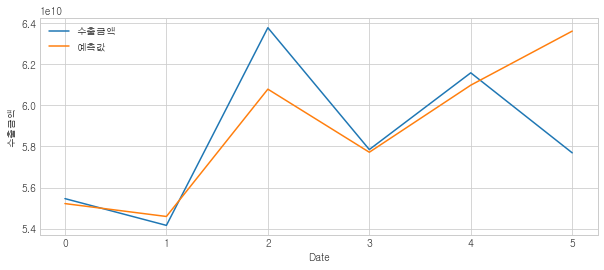

In [61]:
df2 = pd.read_csv('실제값.csv')
plt.figure(figsize=(10,4))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('수출금액')
plt.plot(df2, label='수출금액')
plt.plot(pred, label='예측값')
plt.legend()